## Data Science Intern @ LetsGrowMore



## Author :MAYUREE SHARMA

### LGMVIP Task-1: Iris Flower Classification ML Projects

### Import Required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from warnings import filterwarnings
filterwarnings(action='ignore')

### importing Dataset

In [2]:
data=pd.read_csv(r'C:\Users\vinay.DESKTOP-CKBIKPB\Desktop\iris.data',header=None)
header_list=['sepal_length','sepal_width','petal_length','petal_width','species']
data.to_csv('iris.csv',header=header_list,index=False)
df =pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Analysing Dataset

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data Visulaization

### Pie chart

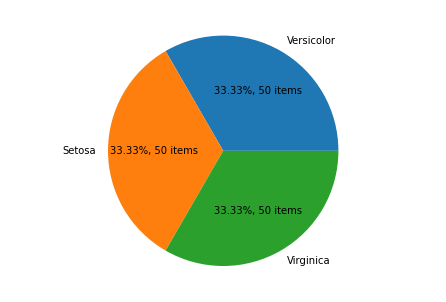

In [8]:
fig=plt.figure()
ax =fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Versicolor', 'Setosa', 'Virginica']
size = [50,50,50]
ax.pie(size, labels=labels,autopct=lambda p:f'{p:.2f}%, {p*sum(size)/100 :.0f} items')
plt.show()

### Violin plot

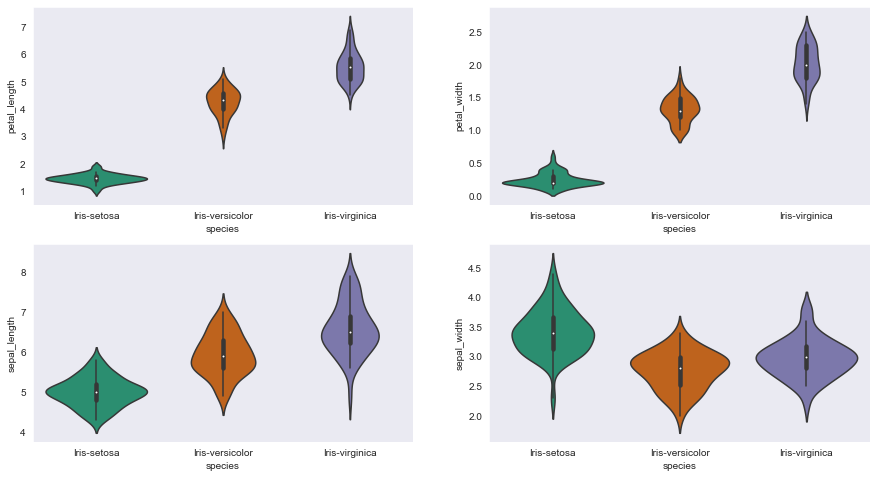

In [9]:
sns.set_style('dark')
sns.set_palette('Dark2')
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(data=df,x='species',y='petal_length')
plt.subplot(2,2,2)
sns.violinplot(data=df,x='species',y='petal_width')
plt.subplot(2,2,3)
sns.violinplot(data=df,x='species',y='sepal_length')
plt.subplot(2,2,4)
sns.violinplot(data=df,x='species',y='sepal_width')
plt.show()


### Area plot

Text(0.5, 1.0, 'Information of Iris Dataset')

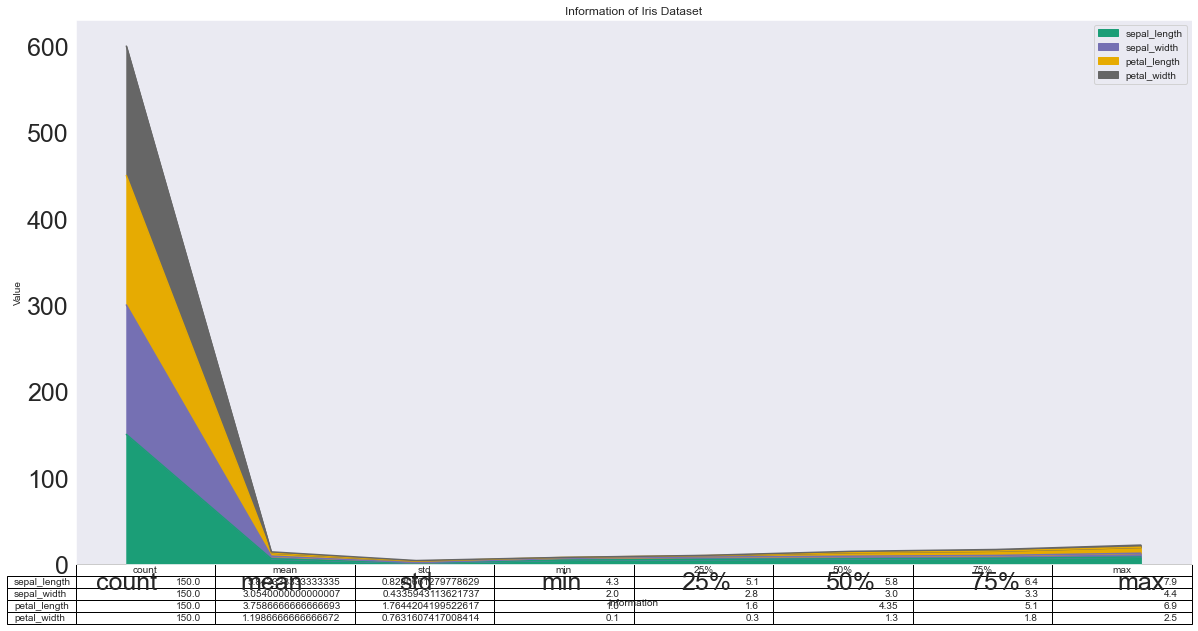

In [10]:
df.describe().plot(kind = "area",fontsize=25, figsize = (20,10), table = True,colormap="Dark2")
plt.xlabel('information',)
plt.ylabel('Value')
plt.title("Information of Iris Dataset")

### Histogram

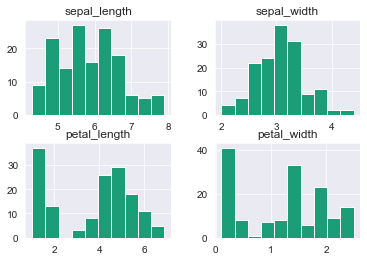

In [11]:
df.hist()
plt.show()

### Pair plot

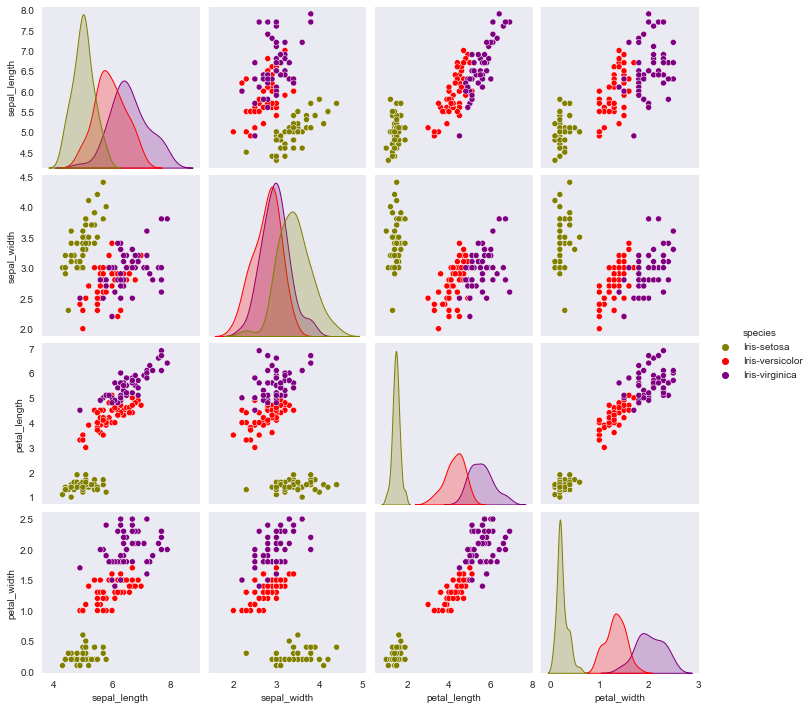

In [13]:
sns.pairplot(df,hue='species',palette='brg_r');

### Data PreProcessing

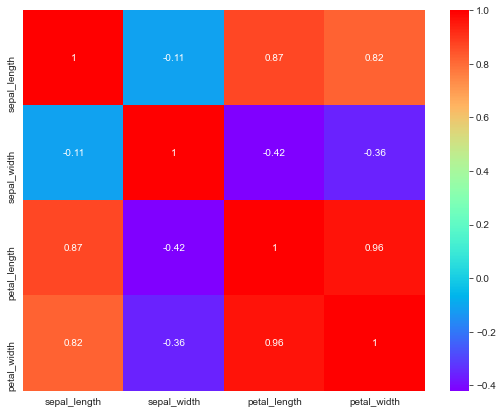

In [15]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

### Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [21]:
df['species'] = lab.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Spliting Data

In [22]:
X = df.drop(columns=['species'])
Y = df['species']

In [23]:
X[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
Y[:5]

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

### Supervised Machine Learning Models

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [26]:
def classify(model, X, Y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(8,5),title_fontsize=16,text_fontsize=14)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(8,5),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.estimators.plot_learning_curve(pipeline_model, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
    plt.show()
    print(classification_report(y_test, y_pred))

### LogisticRegression

Accuracy: 94.73684210526315


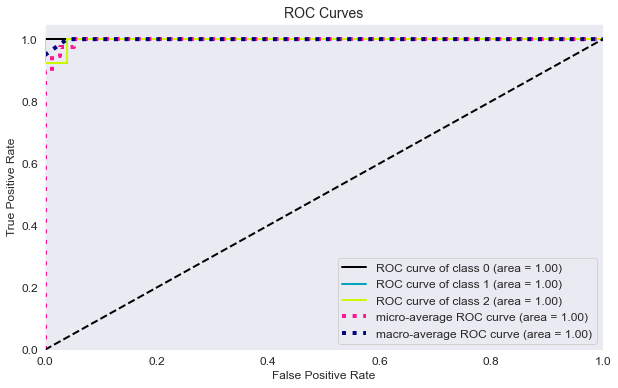

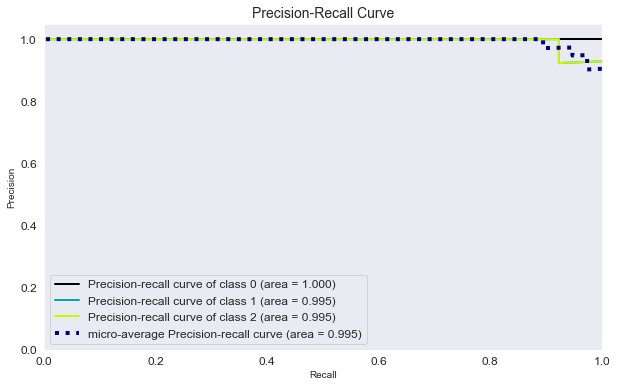

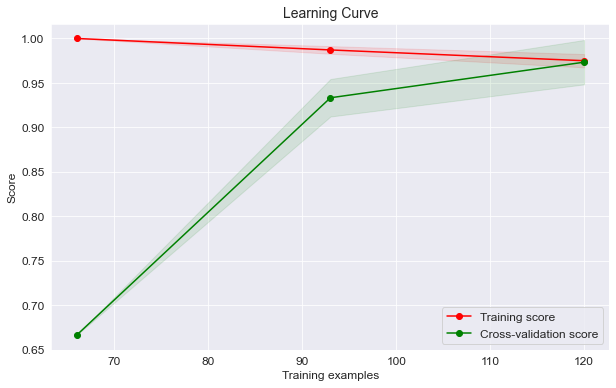

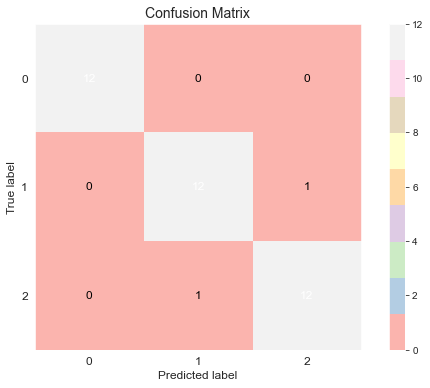

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

### Decision Tree Classifier

Accuracy: 92.10526315789474


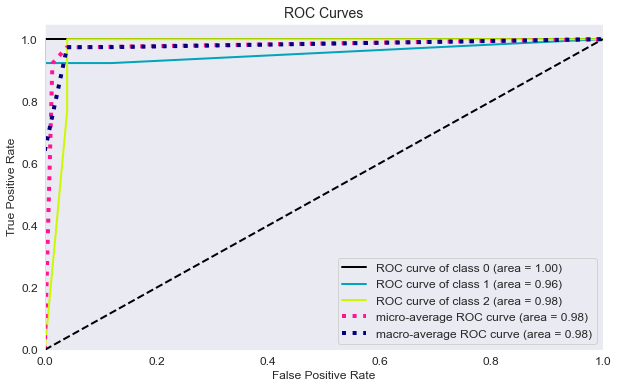

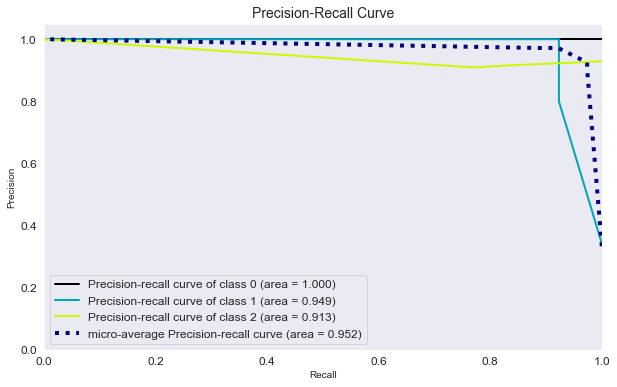

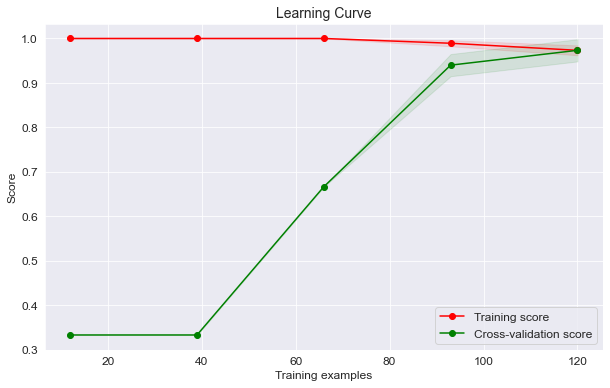

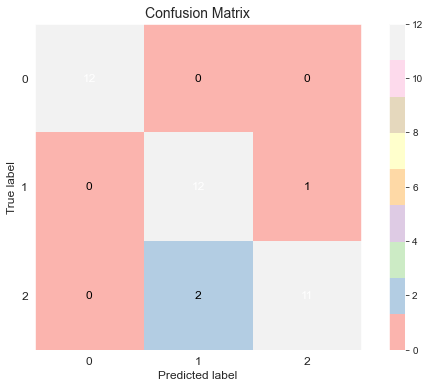

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.7\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

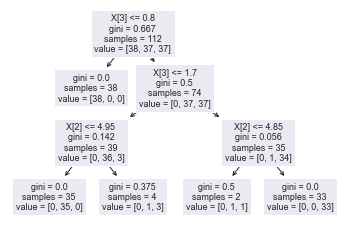

In [32]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
classify(tree_clf,X,Y)
tree.plot_tree(tree_clf)

### KNN Classifier

Accuracy: 92.10526315789474


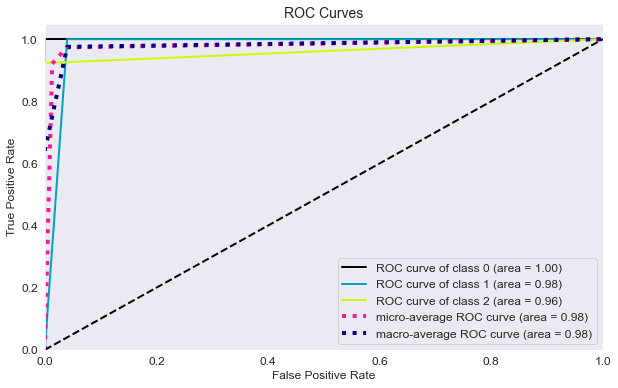

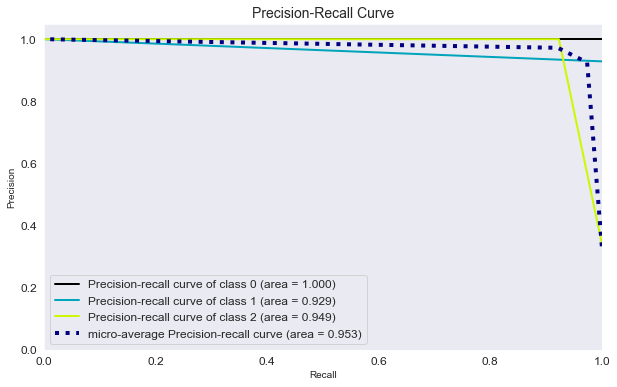

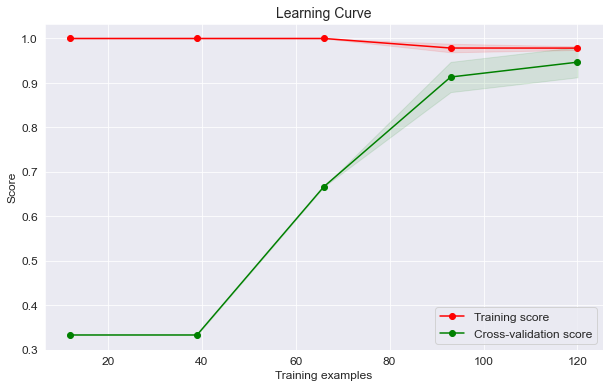

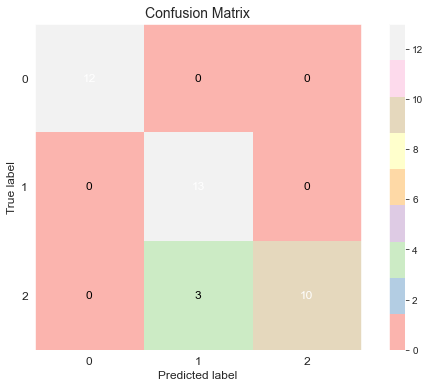

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.81      1.00      0.90        13
           2       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



In [34]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
classify(model,X,Y)

### Support Vector Machine

Accuracy: 89.47368421052632


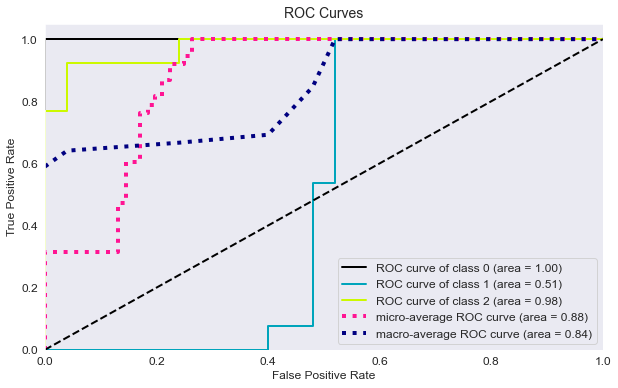

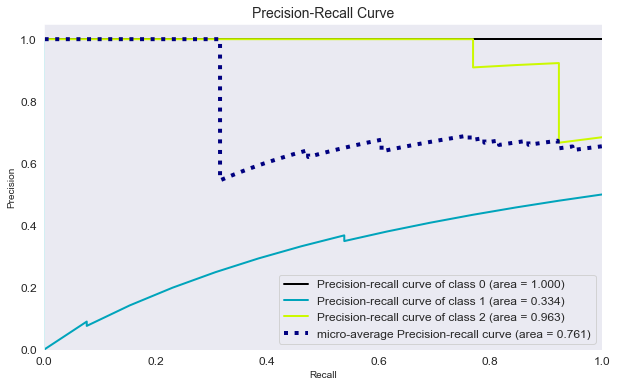

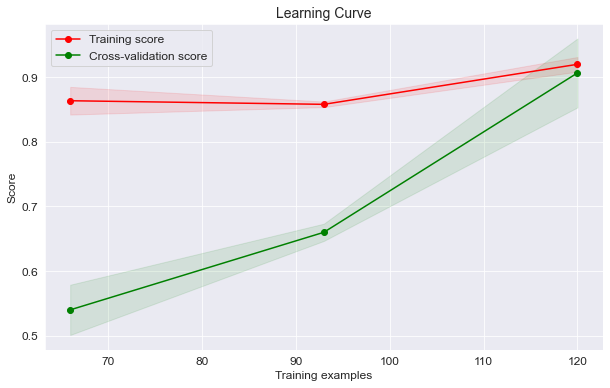

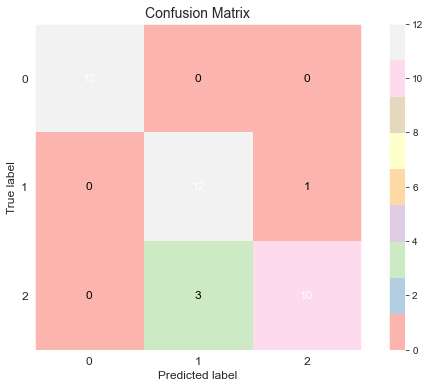

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



In [35]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma=0.002,probability=True )
classify(model, X, Y)

### Random Forest Classifier

Accuracy: 92.10526315789474


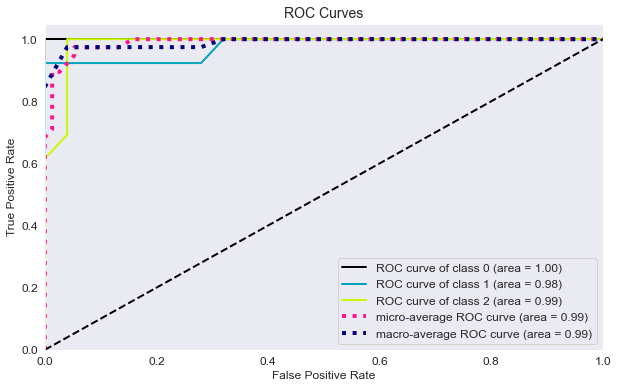

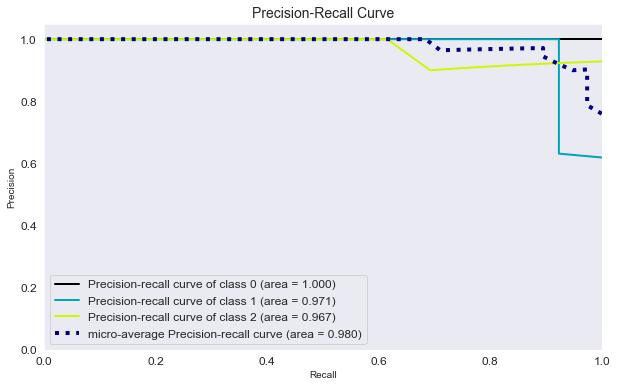

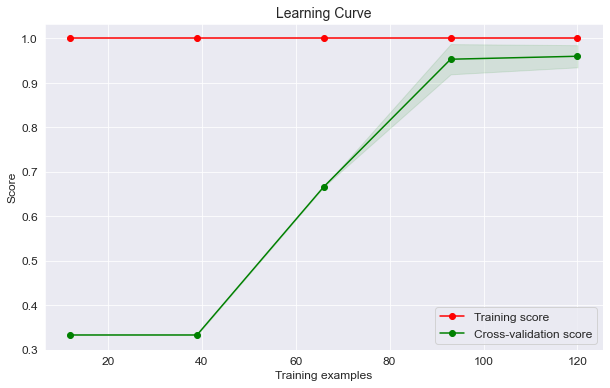

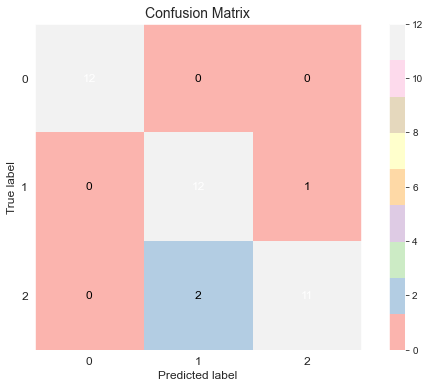

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

### Conclusion :

Analysing with diffrent supervised machine learning algorithms Logistic Regression has the highest accuracy of 94 % than the KNN,Random Forest Classifier and Decision Tree classifiers with 92%

### THANK YOU